In [1]:
# Section must be included at the beginning of each new notebook.
import findspark
findspark.init('/home/ubuntu/spark-2.1.1-bin-hadoop2.7')
import pyspark
import pandas as pd
from pyspark.sql import SparkSession
spark = SparkSession.builder.appName('basics').getOrCreate()
from pyspark.ml.regression import LinearRegression
from pyspark.ml.feature import StringIndexer

In [2]:
# Let's read in the data. 
df = spark.read.csv('Datasets/KaggleV2-May-2016.csv',header=True,inferSchema=True)

In [ ]:
## Basic Data Exploration
#Now that we've started the session and imported the data, let's explore the data.

In [3]:
# The show method allows you visualise DataFrames in a tabular format. 
df.show(5)

+-------------------+-------------+------+--------------------+--------------------+---+-----------------+-----------+------------+--------+----------+-------+------------+-------+
|          PatientId|AppointmentID|Gender|        ScheduledDay|      AppointmentDay|Age|    Neighbourhood|Scholarship|Hipertension|Diabetes|Alcoholism|Handcap|SMS_received|No-show|
+-------------------+-------------+------+--------------------+--------------------+---+-----------------+-----------+------------+--------+----------+-------+------------+-------+
| 2.9872499824296E13|      5642903|     F|2016-04-29 18:38:...|2016-04-29 00:00:...| 62|  JARDIM DA PENHA|          0|           1|       0|         0|      0|           0|     No|
|5.58997776694438E14|      5642503|     M|2016-04-29 16:08:...|2016-04-29 00:00:...| 56|  JARDIM DA PENHA|          0|           0|       0|         0|      0|           0|     No|
|  4.262962299951E12|      5642549|     F|2016-04-29 16:19:...|2016-04-29 00:00:...| 62|    MAT

In [4]:
# Some general statistics on our data. 
df.describe().show()

# Print schema allows us to visualise the data structure at a high level. 
df.printSchema()

# Use head to print a specific amount of rows
print(df.head(1))

+-------+--------------------+-----------------+------+------------------+-------------+-------------------+-------------------+-------------------+--------------------+--------------------+-------------------+-------+
|summary|           PatientId|    AppointmentID|Gender|               Age|Neighbourhood|        Scholarship|       Hipertension|           Diabetes|          Alcoholism|             Handcap|       SMS_received|No-show|
+-------+--------------------+-----------------+------+------------------+-------------+-------------------+-------------------+-------------------+--------------------+--------------------+-------------------+-------+
|  count|              110527|           110527|110527|            110527|       110527|             110527|             110527|             110527|              110527|              110527|             110527| 110527|
|   mean|1.474962657103923...|5675305.123426855|  null| 37.08887421173107|         null|0.09826558216544373| 0.1972459218109

In [5]:
# We can use the describe method get some general statistics on our data too. 
df.describe().show()

+-------+--------------------+-----------------+------+------------------+-------------+-------------------+-------------------+-------------------+--------------------+--------------------+-------------------+-------+
|summary|           PatientId|    AppointmentID|Gender|               Age|Neighbourhood|        Scholarship|       Hipertension|           Diabetes|          Alcoholism|             Handcap|       SMS_received|No-show|
+-------+--------------------+-----------------+------+------------------+-------------+-------------------+-------------------+-------------------+--------------------+--------------------+-------------------+-------+
|  count|              110527|           110527|110527|            110527|       110527|             110527|             110527|             110527|              110527|              110527|             110527| 110527|
|   mean|1.474962657103923...|5675305.123426855|  null| 37.08887421173107|         null|0.09826558216544373| 0.1972459218109

In [6]:
df.select('Age','Scholarship','Hipertension','Diabetes','Alcoholism','Handcap','SMS_received').describe().show()

+-------+------------------+-------------------+-------------------+-------------------+--------------------+--------------------+-------------------+
|summary|               Age|        Scholarship|       Hipertension|           Diabetes|          Alcoholism|             Handcap|       SMS_received|
+-------+------------------+-------------------+-------------------+-------------------+--------------------+--------------------+-------------------+
|  count|            110527|             110527|             110527|             110527|              110527|              110527|             110527|
|   mean| 37.08887421173107|0.09826558216544373| 0.1972459218109602|0.07186479321794674|0.030399811810688793|0.022247957512643968|0.32102563174608917|
| stddev|23.110204963682676| 0.2976747541093073|0.39792134994708606|0.25826507350746536|  0.1716855554142438|  0.1615427258142786|0.46687273170186905|
|    min|                -1|                  0|                  0|                  0|      

In [7]:
# Let's see how many rows of data we originally have.
print("Total data points:", df.count())

Total data points: 110527


In [34]:
# How many in each group?
df.groupby('No-Show').count().toPandas()

,No-Show,count
0,No,88208
1,Yes,22319


In [3]:
# rename columns typos
from pyspark.sql.functions import *

df_rename5 = df.select("PatientId","AppointmentID","Gender","ScheduledDay","AppointmentDay","Age","Neighbourhood",
                       col("Scholarship").alias("Govt_welfare"), col("Hipertension").alias("Hypertension"),
                       "Diabetes","Alcoholism",col("Handcap").alias("Handicap"),"SMS_received","No-show")
df_rename5.show(5)


+-------------------+-------------+------+--------------------+--------------------+---+-----------------+------------+------------+--------+----------+--------+------------+-------+
|          PatientId|AppointmentID|Gender|        ScheduledDay|      AppointmentDay|Age|    Neighbourhood|Govt_welfare|Hypertension|Diabetes|Alcoholism|Handicap|SMS_received|No-show|
+-------------------+-------------+------+--------------------+--------------------+---+-----------------+------------+------------+--------+----------+--------+------------+-------+
| 2.9872499824296E13|      5642903|     F|2016-04-29 18:38:...|2016-04-29 00:00:...| 62|  JARDIM DA PENHA|           0|           1|       0|         0|       0|           0|     No|
|5.58997776694438E14|      5642503|     M|2016-04-29 16:08:...|2016-04-29 00:00:...| 56|  JARDIM DA PENHA|           0|           0|       0|         0|       0|           0|     No|
|  4.262962299951E12|      5642549|     F|2016-04-29 16:19:...|2016-04-29 00:00:...| 

In [4]:
df_rename5.printSchema()
from pyspark.sql import functions as F
timeFmt = "yyyy-MM-dd'T'HH:mm:ss.SSS"
timeDiff = (F.unix_timestamp('AppointmentDay', format=timeFmt)
            - F.unix_timestamp('ScheduledDay', format=timeFmt))
df_rename5 = df_rename5.withColumn("DayBetween", timeDiff)
df_rename5.show(5)

root
 |-- PatientId: double (nullable = true)
 |-- AppointmentID: integer (nullable = true)
 |-- Gender: string (nullable = true)
 |-- ScheduledDay: timestamp (nullable = true)
 |-- AppointmentDay: timestamp (nullable = true)
 |-- Age: integer (nullable = true)
 |-- Neighbourhood: string (nullable = true)
 |-- Govt_welfare: integer (nullable = true)
 |-- Hypertension: integer (nullable = true)
 |-- Diabetes: integer (nullable = true)
 |-- Alcoholism: integer (nullable = true)
 |-- Handicap: integer (nullable = true)
 |-- SMS_received: integer (nullable = true)
 |-- No-show: string (nullable = true)

+-------------------+-------------+------+--------------------+--------------------+---+-----------------+------------+------------+--------+----------+--------+------------+-------+----------+
|          PatientId|AppointmentID|Gender|        ScheduledDay|      AppointmentDay|Age|    Neighbourhood|Govt_welfare|Hypertension|Diabetes|Alcoholism|Handicap|SMS_received|No-show|DayBetween|
+----

In [5]:
from pyspark.ml.feature import StringIndexer

indexer = StringIndexer(inputCol="No-show", outputCol="NoShowIndex")
indexed = indexer.fit(df_rename5).transform(df_rename5)
indexed.show()

+-------------------+-------------+------+--------------------+--------------------+---+-----------------+------------+------------+--------+----------+--------+------------+-------+----------+-----------+
|          PatientId|AppointmentID|Gender|        ScheduledDay|      AppointmentDay|Age|    Neighbourhood|Govt_welfare|Hypertension|Diabetes|Alcoholism|Handicap|SMS_received|No-show|DayBetween|NoShowIndex|
+-------------------+-------------+------+--------------------+--------------------+---+-----------------+------------+------------+--------+----------+--------+------------+-------+----------+-----------+
| 2.9872499824296E13|      5642903|     F|2016-04-29 18:38:...|2016-04-29 00:00:...| 62|  JARDIM DA PENHA|           0|           1|       0|         0|       0|           0|     No|    -67088|        0.0|
|5.58997776694438E14|      5642503|     M|2016-04-29 16:08:...|2016-04-29 00:00:...| 56|  JARDIM DA PENHA|           0|           0|       0|         0|       0|           0|  

In [25]:
indexed.show(1)

+------------------+-------------+------+--------------------+--------------------+---+---------------+------------+------------+--------+----------+--------+------------+-------+----------+-----------+
|         PatientId|AppointmentID|Gender|        ScheduledDay|      AppointmentDay|Age|  Neighbourhood|Govt_welfare|Hypertension|Diabetes|Alcoholism|Handicap|SMS_received|No-show|DayBetween|NoShowIndex|
+------------------+-------------+------+--------------------+--------------------+---+---------------+------------+------------+--------+----------+--------+------------+-------+----------+-----------+
|2.9872499824296E13|      5642903|     F|2016-04-29 18:38:...|2016-04-29 00:00:...| 62|JARDIM DA PENHA|           0|           1|       0|         0|       0|           0|     No|    -67088|        0.0|
+------------------+-------------+------+--------------------+--------------------+---+---------------+------------+------------+--------+----------+--------+------------+-------+---------

In [6]:
# Reduce data
df_rename6 = indexed.select("Age","Govt_welfare","Hypertension","Diabetes","Alcoholism",
                               "Handicap","SMS_received","DayBetween","NoShowIndex")
df_rename6.show(1)

+---+------------+------------+--------+----------+--------+------------+----------+-----------+
|Age|Govt_welfare|Hypertension|Diabetes|Alcoholism|Handicap|SMS_received|DayBetween|NoShowIndex|
+---+------------+------------+--------+----------+--------+------------+----------+-----------+
| 62|           0|           1|       0|         0|       0|           0|    -67088|        0.0|
+---+------------+------------+--------+----------+--------+------------+----------+-----------+
only showing top 1 row



In [40]:
# Using a Python package to neatly describe the data.
import pandas as pd
df_rename6.describe().toPandas().transpose()

,0,1,2,3,4
summary,count,mean,stddev,min,max
Age,110527,37.08887421173107,23.110204963682676,-1,115
Govt_welfare,110527,0.09826558216544373,0.2976747541093073,0,1
Hypertension,110527,0.1972459218109602,0.39792134994708606,0,1
Diabetes,110527,0.07186479321794674,0.25826507350746536,0,1
Alcoholism,110527,0.030399811810688793,0.1716855554142438,0,1
Handicap,110527,0.022247957512643968,0.1615427258142786,0,4
SMS_received,110527,0.32102563174608917,0.46687273170186905,0,1
DayBetween,110527,839314.1619604259,1317087.8915041287,-568160,15427141
NoShowIndex,110527,0.20193255946510807,0.40144396741443283,0.0,1.0


In [41]:
# Import VectorAssembler and Vectors
from pyspark.ml.feature import VectorAssembler

# The input columns are the feature column names, and the output column is what you'd like the new column to be named. 
vector_assembler = VectorAssembler(inputCols = ['Age', 'Govt_welfare', 'Hypertension', 'Diabetes', 'Alcoholism', 
                                                'Handicap', 'SMS_received', 'DayBetween'], outputCol = 'features')

# Now that we've created the assembler variable, let's actually transform the data.
vector_output = vector_assembler.transform(df_rename6)

# Using print schema, you see that the features output column has been added. 
vector_output.printSchema()

# You can see that the features column is a DenseVector that combines the various features as expected.
vector_output.head(1)

root
 |-- Age: integer (nullable = true)
 |-- Govt_welfare: integer (nullable = true)
 |-- Hypertension: integer (nullable = true)
 |-- Diabetes: integer (nullable = true)
 |-- Alcoholism: integer (nullable = true)
 |-- Handicap: integer (nullable = true)
 |-- SMS_received: integer (nullable = true)
 |-- DayBetween: long (nullable = true)
 |-- NoShowIndex: double (nullable = true)
 |-- features: vector (nullable = true)



[Row(Age=62, Govt_welfare=0, Hypertension=1, Diabetes=0, Alcoholism=0, Handicap=0, SMS_received=0, DayBetween=-67088, NoShowIndex=0.0, features=SparseVector(8, {0: 62.0, 2: 1.0, 7: -67088.0}))]

In [42]:
# Because the features have been combined into one vector, we no longer need them. Below we select the features and label.
vector_output = vector_output.select(['features', 'NoShowIndex'])

# You can see that the dataframe now only contains two columns. 
print(vector_output.head(1))
vector_output.show(3)

[Row(features=SparseVector(8, {0: 62.0, 2: 1.0, 7: -67088.0}), NoShowIndex=0.0)]
+--------------------+-----------+
|            features|NoShowIndex|
+--------------------+-----------+
|(8,[0,2,7],[62.0,...|        0.0|
|(8,[0,7],[56.0,-5...|        0.0|
|(8,[0,7],[62.0,-5...|        0.0|
+--------------------+-----------+
only showing top 3 rows



In [43]:
# Let's do a randomised 70/30 split.
train_data,test_data = vector_output.randomSplit([0.7,0.3])

# Let's see our training data.
train_data.describe().show()

# And our testing data.
test_data.describe().show()

+-------+-------------------+
|summary|        NoShowIndex|
+-------+-------------------+
|  count|              77346|
|   mean|0.20136787939906395|
| stddev|0.40102485681798905|
|    min|                0.0|
|    max|                1.0|
+-------+-------------------+

+-------+-------------------+
|summary|        NoShowIndex|
+-------+-------------------+
|  count|              33181|
|   mean|0.20324884723184955|
| stddev|0.40242220856234306|
|    min|                0.0|
|    max|                1.0|
+-------+-------------------+



In [44]:
# Build Logistic Regression
from pyspark.ml.classification import LogisticRegression

# Instantiate the model.
lr_model = LogisticRegression(featuresCol='features',labelCol='NoShowIndex')

# Fit the model.
lr_model = lr_model.fit(train_data)

# And evaluate the model using the test data.
results = lr_model.transform(test_data)

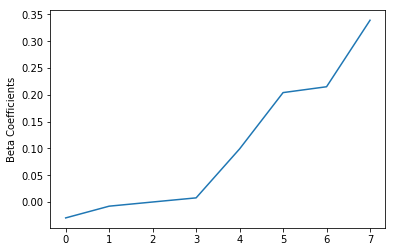

In [45]:
# Model Evaluation 
import matplotlib.pyplot as plt
import numpy as np

# Visualising the coefficients. Sort from lowest to highest.
beta = np.sort(lr_model.coefficients)

# Plot the data.
plt.plot(beta)

# Add a label to the data.
plt.ylabel('Beta Coefficients')

# Show the graph. 
plt.show()

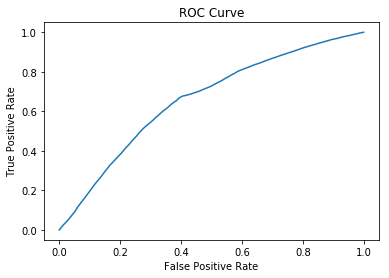

Area Under the Curve: 0.659529203980331


In [46]:
# Let's get a summary of the data.
training_summary = lr_model.summary

# Convert the DataFrame to a Pandas DataFrame.
ROC = training_summary.roc.toPandas()

# Plot the true positive and false positive rates.
plt.plot(ROC['FPR'],ROC['TPR'])

# Define the labels.
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC Curve')
plt.show()

# Print the AUC statistic. 
print('Area Under the Curve: ' + str(training_summary.areaUnderROC))

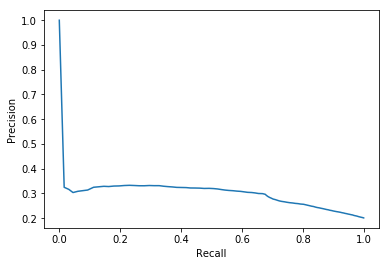

In [47]:
# Convert DataFrame to Pandas DataFrame.
pr = training_summary.pr.toPandas()

# Plot model recall and precision.
plt.plot(pr['recall'],pr['precision'])

# Define the labels and show the graph. 
plt.ylabel('Precision')
plt.xlabel('Recall')
plt.show()

In [51]:
# Print the coefficients.
print("Coefficients: " + str(lr_model.coefficients))

# Print the intercept.
print("Intercept: " + str(lr_model.intercept) + "\n")

# Summarise the model and print out some evaluation metrics.
training_summary = lr_model.summary


Coefficients: [-0.007797132517357763,0.2151137413552808,-0.02970683135166243,0.09908579370490855,0.20419838069751764,0.007718332035557372,0.33924946989774535,2.632045753952685e-07]
Intercept: -1.5082640834533787



In [7]:
#Iteration1
# Reduce data
df_rename7 = indexed.select("Govt_welfare","Hypertension","Diabetes","Alcoholism",
                            "SMS_received","DayBetween","NoShowIndex")
df_rename7.show(1)

+------------+------------+--------+----------+------------+----------+-----------+
|Govt_welfare|Hypertension|Diabetes|Alcoholism|SMS_received|DayBetween|NoShowIndex|
+------------+------------+--------+----------+------------+----------+-----------+
|           0|           1|       0|         0|           0|    -67088|        0.0|
+------------+------------+--------+----------+------------+----------+-----------+
only showing top 1 row



In [8]:
#Iteration1
# Using a Python package to neatly describe the data.
import pandas as pd
df_rename7.describe().toPandas().transpose()

,0,1,2,3,4
summary,count,mean,stddev,min,max
Govt_welfare,110527,0.09826558216544373,0.2976747541093073,0,1
Hypertension,110527,0.1972459218109602,0.39792134994708606,0,1
Diabetes,110527,0.07186479321794674,0.25826507350746536,0,1
Alcoholism,110527,0.030399811810688793,0.1716855554142438,0,1
SMS_received,110527,0.32102563174608917,0.46687273170186905,0,1
DayBetween,110527,839314.1619604259,1317087.8915041287,-568160,15427141
NoShowIndex,110527,0.20193255946510807,0.40144396741443283,0.0,1.0


In [9]:
#Iteration1
# Import VectorAssembler and Vectors
from pyspark.ml.feature import VectorAssembler

# The input columns are the feature column names, and the output column is what you'd like the new column to be named. 
vector_assembler = VectorAssembler(inputCols = ['Govt_welfare', 'Hypertension', 'Diabetes', 'Alcoholism', 
                                                'SMS_received', 'DayBetween'], outputCol = 'features')

# Now that we've created the assembler variable, let's actually transform the data.
vector_output = vector_assembler.transform(df_rename7)

# Using print schema, you see that the features output column has been added. 
vector_output.printSchema()

# You can see that the features column is a DenseVector that combines the various features as expected.
vector_output.head(1)

root
 |-- Govt_welfare: integer (nullable = true)
 |-- Hypertension: integer (nullable = true)
 |-- Diabetes: integer (nullable = true)
 |-- Alcoholism: integer (nullable = true)
 |-- SMS_received: integer (nullable = true)
 |-- DayBetween: long (nullable = true)
 |-- NoShowIndex: double (nullable = true)
 |-- features: vector (nullable = true)



[Row(Govt_welfare=0, Hypertension=1, Diabetes=0, Alcoholism=0, SMS_received=0, DayBetween=-67088, NoShowIndex=0.0, features=SparseVector(6, {1: 1.0, 5: -67088.0}))]

In [10]:
#Iteration1
# Because the features have been combined into one vector, we no longer need them. Below we select the features and label.
vector_output = vector_output.select(['features', 'NoShowIndex'])

# You can see that the dataframe now only contains two columns. 
print(vector_output.head(1))
vector_output.show(3)

[Row(features=SparseVector(6, {1: 1.0, 5: -67088.0}), NoShowIndex=0.0)]
+--------------------+-----------+
|            features|NoShowIndex|
+--------------------+-----------+
|(6,[1,5],[1.0,-67...|        0.0|
|  (6,[5],[-58107.0])|        0.0|
|  (6,[5],[-58744.0])|        0.0|
+--------------------+-----------+
only showing top 3 rows



In [11]:
#Iteration1
# Let's do a randomised 70/30 split.
train_data,test_data = vector_output.randomSplit([0.7,0.3])

# Let's see our training data.
train_data.describe().show()

# And our testing data.
test_data.describe().show()

+-------+-------------------+
|summary|        NoShowIndex|
+-------+-------------------+
|  count|              77284|
|   mean|0.20108948812173283|
| stddev| 0.4008173956364023|
|    min|                0.0|
|    max|                1.0|
+-------+-------------------+

+-------+-------------------+
|summary|        NoShowIndex|
+-------+-------------------+
|  count|              33243|
|   mean| 0.2038925488072677|
| stddev|0.40289609124296355|
|    min|                0.0|
|    max|                1.0|
+-------+-------------------+



In [12]:
#Iteration1
# Build Logistic Regression
from pyspark.ml.classification import LogisticRegression

# Instantiate the model.
lr_model = LogisticRegression(featuresCol='features',labelCol='NoShowIndex')

# Fit the model.
lr_model = lr_model.fit(train_data)

# And evaluate the model using the test data.
results = lr_model.transform(test_data)

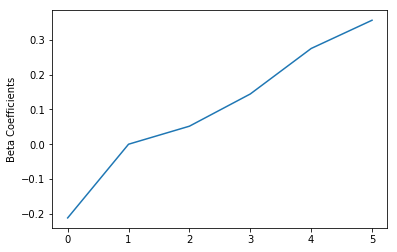

In [14]:
#Iteration1
# Model Evaluation 
import matplotlib.pyplot as plt
import numpy as np

# Visualising the coefficients. Sort from lowest to highest.
beta = np.sort(lr_model.coefficients)

# Plot the data.
plt.plot(beta)

# Add a label to the data.
plt.ylabel('Beta Coefficients')

# Show the graph. 
plt.show()

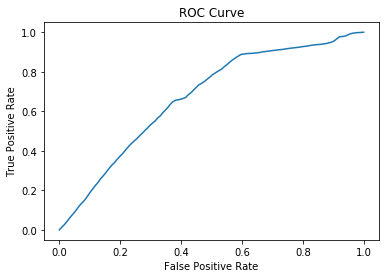

Area Under the Curve: 0.6726440666728818


In [15]:
#Iteration1
# Let's get a summary of the data.
training_summary = lr_model.summary

# Convert the DataFrame to a Pandas DataFrame.
ROC = training_summary.roc.toPandas()

# Plot the true positive and false positive rates.
plt.plot(ROC['FPR'],ROC['TPR'])

# Define the labels.
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC Curve')
plt.show()

# Print the AUC statistic. 
print('Area Under the Curve: ' + str(training_summary.areaUnderROC))

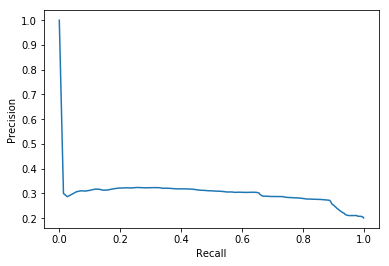

In [16]:
# Iteration1
# Convert DataFrame to Pandas DataFrame.
pr = training_summary.pr.toPandas()

# Plot model recall and precision.
plt.plot(pr['recall'],pr['precision'])

# Define the labels and show the graph. 
plt.ylabel('Precision')
plt.xlabel('Recall')
plt.show()

In [17]:
# Iteration1
# Print the coefficients.
print("Coefficients: " + str(lr_model.coefficients))

# Print the intercept.
print("Intercept: " + str(lr_model.intercept) + "\n")

# Summarise the model and print out some evaluation metrics.
training_summary = lr_model.summary


Coefficients: [0.2753561341047152,-0.21196257368871355,0.051870710336337784,0.1445231660778148,0.35660898917619366,2.62227012506319e-07]
Intercept: -1.7624121813888611

